<a href="https://colab.research.google.com/github/mphirke/1PAW/blob/master/Week%202/Copy_of_NNLM_Torch(loss%20plot%20added).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import matplotlib.pyplot as plt


In [0]:
# setting the data type as float

dtype = torch.FloatTensor

In [0]:
# Our sentences for training

sentences = [ "I like dog", "I love coffee", "I hate milk"]

In [4]:
# join all the sentences and get their splits
word_list = " ".join(sentences).split()
print('All words from our corpus: ', word_list)

# get the unique words from the whole corpus.
word_list = list(set(word_list))
print('\nUnique words from our corpus: ', word_list)

# creating a dictionary for words to index
word_dict = {w:i for i, w in enumerate(word_list)}
print('\nWord to index dictionary: ', word_dict)

# creating a dictionary for index to words
number_dict = {i:w for i, w in enumerate(word_list)}
print('\nIndex to word  dictionary: ', number_dict)

All words from our corpus:  ['I', 'like', 'dog', 'I', 'love', 'coffee', 'I', 'hate', 'milk']

Unique words from our corpus:  ['dog', 'love', 'like', 'coffee', 'hate', 'I', 'milk']

Word to index dictionary:  {'dog': 0, 'love': 1, 'like': 2, 'coffee': 3, 'hate': 4, 'I': 5, 'milk': 6}

Index to word  dictionary:  {0: 'dog', 1: 'love', 2: 'like', 3: 'coffee', 4: 'hate', 5: 'I', 6: 'milk'}


In [0]:
# Neural network language model parameters

n_step = 2                   # sentence length input.
n_hidden = 2                 # number of hidden neurons/nodes
features = 2                 # number of features to be learnt for a word
vocab_size = len(word_dict)  # size of vocabulary 

In [6]:
# function to make batch sizes for the sentences in the corpus.

def make_batch(sentences):
  input_batch = []
  target_batch = []
  og_input_batch = []
  og_target_batch = []

  for sen in sentences:
    word = sen.split()
    input = [word_dict[w] for w in word[:-1]]
    target = word_dict[word[-1]]


    og_input_batch.append([w for w in word[:-1]])
    og_target_batch.append(word[-1])

    input_batch.append(input)
    target_batch.append(target)

  print('The original input batch is:  ',og_input_batch)
  print('The original target batch is: ',og_target_batch)

  print('\nThe passed input batch is:  ',input_batch)
  print('The passed target batch is: ',target_batch)

  print('\nThis function returns a tuple of\n\
input_batch and target_batch :\n\n',(input_batch, target_batch))

  return input_batch, target_batch

make_batch(sentences)

The original input batch is:   [['I', 'like'], ['I', 'love'], ['I', 'hate']]
The original target batch is:  ['dog', 'coffee', 'milk']

The passed input batch is:   [[5, 2], [5, 1], [5, 4]]
The passed target batch is:  [0, 3, 6]

This function returns a tuple of
input_batch and target_batch :

 ([[5, 2], [5, 1], [5, 4]], [0, 3, 6])


([[5, 2], [5, 1], [5, 4]], [0, 3, 6])

$y = b + Wx + Utanh(d + Hx)$

We are modelling this.

In [0]:
# Creating the model
#

class NNLM(nn.Module):
  def __init__(self):
    super(NNLM, self).__init__()

    # used to store word embeddings and retrieve them using indices (word to index)
    self.C = nn.Embedding(num_embeddings=vocab_size, embedding_dim=features)

    # H is the number of hidden units
    self.H = nn.Parameter(torch.randn(n_step * features, n_hidden)).type(dtype)

    # W is the weights to be learnt
    self.W = nn.Parameter(torch.randn(n_step * features, vocab_size)).type(dtype)

    # d are the hidden layer biases
    self.d = nn.Parameter(torch.randn(n_hidden)).type(dtype)

    # Hidden to output weights
    self.U = nn.Parameter(torch.randn(n_hidden, vocab_size)).type(dtype)

    # Output biases b
    self.b = nn.Parameter(torch.randn(vocab_size)).type(dtype)

  def forward(self, X):
    X = self.C(X)
    X = X.view(-1, n_step * features)                               # [batch_size, n_step * features]
    tanh = torch.tanh(self.d + torch.mm(X, self.H))                 # [batch_size, n_hidden]
    output = self.b + torch.mm(X, self.W) + torch.mm(tanh, self.U)  # [batch_size, n_hidden]

    return output


In [0]:
# Initialize model
model = NNLM()

In [0]:
# Set up loss function and optimizers

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# creating batches for passing inputs

input_batch, target_batch = make_batch(sentences)
input_batch = Variable(torch.LongTensor(input_batch))
target_batch = Variable(torch.LongTensor(target_batch))


print('\n\nThe input batch is converted to tensor (below): \n\n', input_batch)
print('\n\nThe target batch is converted to tensor (below): \n\n', target_batch)

The original input batch is:   [['I', 'like'], ['I', 'love'], ['I', 'hate']]
The original target batch is:  ['dog', 'coffee', 'milk']

The passed input batch is:   [[5, 2], [5, 1], [5, 4]]
The passed target batch is:  [0, 3, 6]

This function returns a tuple of
input_batch and target_batch :

 ([[5, 2], [5, 1], [5, 4]], [0, 3, 6])


The input batch is converted to tensor (below): 

 tensor([[5, 2],
        [5, 1],
        [5, 4]])


The target batch is converted to tensor (below): 

 tensor([0, 3, 6])


In [39]:
# Let the training begin!

losses =  []
for epoch in range(5000):
  # Clears the gradients of all optimized Tensors.
  optimizer.zero_grad()

  output = model(input_batch)                 # [batch_size, vocab_size]

  loss = criterion(output, target_batch)      # target_batch = [batch_size]
  losses.append(loss.detach())
  if (epoch + 1)%500 == 0:
    print('Epoch:', '%04d' %(epoch + 1), 'cost =', '{:.6f}'.format(loss))

  loss.backward()
  optimizer.step()



Epoch: 0500 cost = 0.000065
Epoch: 1000 cost = 0.000050
Epoch: 1500 cost = 0.000038
Epoch: 2000 cost = 0.000029
Epoch: 2500 cost = 0.000022
Epoch: 3000 cost = 0.000017
Epoch: 3500 cost = 0.000013
Epoch: 4000 cost = 0.000010
Epoch: 4500 cost = 0.000007
Epoch: 5000 cost = 0.000006


Text(0, 0.5, 'Loss')

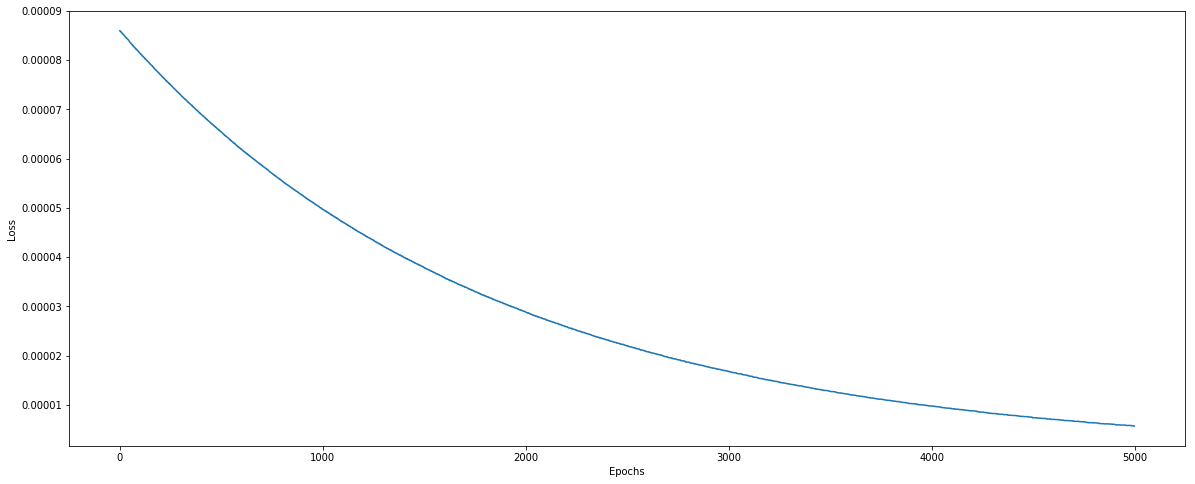

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")

In [42]:
import plotly.graph_objects as go
import numpy as np

x = np.arange(len(losses))

fig = go.Figure(data=go.Scatter(x=x, y=losses))
fig.show()

In [12]:
# Let's predict

predict = model(input_batch).data.max(1, keepdim=False)[1]
#predict = model(input_batch).data.max(1, keepdim=True)[1]
print(predict)


tensor([0, 3, 6])


In [13]:
# Let's see what that tensors actually contain.

first_half = [sen.split()[:2] for sen in sentences]
answers = [number_dict[n.item()] for n in predict.squeeze()]

zipped = zip(first_half, answers)
print('\n\nThe results are:\n')

for a, b in zipped:
  print(' '.join(a), b)



The results are:

I like dog
I love coffee
I hate milk
